<a href="https://colab.research.google.com/github/slstyrn21/Pengolahan-Citra-Project/blob/main/Program_Histogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import matplotlib.pyplot as plt
import skimage.io as io
import cv2
from pylab import *
from PIL import Image

In [5]:
# membaca gambar

img_terang = io.imread("/terang.jpg")
img_sedang = io.imread("/sedang.jpg")
img_gelap = io.imread("/gelap.jpg")

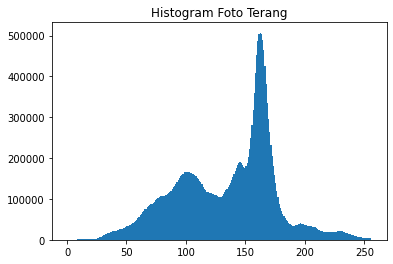

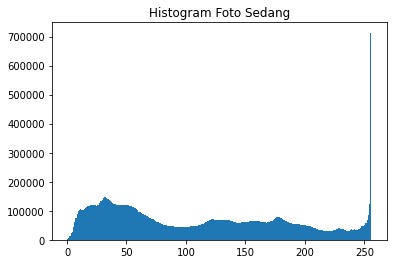

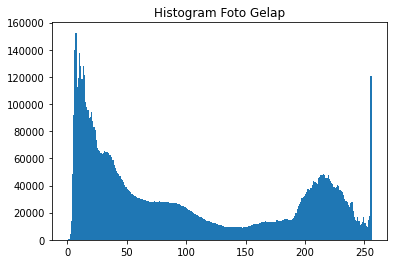

In [11]:
# fungsi histogram all channel 256 bins menampilkan 3 foto berbeda (terang, sedang, gelap)

def histogram(img, bins, title):
  plt.hist(img.ravel(),bins,[0,256]);
  plt.title(title)
  plt.show()

figure(0)
histogram(img_terang,256,"Histogram Foto Terang")

figure(1)
histogram(img_sedang,256,"Histogram Foto Sedang")

figure(2)
histogram(img_gelap,256,"Histogram Foto Gelap")

In [7]:
# fungsi untuk memecah foto menjadi channel R, G, B sesuai banyak bins

def rgb_bins(image, bins, title, titleR, titleG, titleB):
  img = Image.open(image)
  lebar, tinggi = (img.size)

  listR = []
  listG = []
  listB = []

  for x in range(lebar):
    for y in range(tinggi):
      r, g, b = img.getpixel((x,y))
      listR.append(r)
      listG.append(g)
      listB.append(b)

  fig, axs = plt.subplots(1, 4, figsize=(20,5))

  axs[0].set_title(title)
  axs[0].imshow(img)
  axs[1].set_title(titleR)
  axs[1].hist(listR, bins, facecolor='red', alpha=0.5)
  axs[2].set_title(titleG)
  axs[2].hist(listG, bins, facecolor='green', alpha=0.5)
  axs[3].set_title(titleB)
  axs[3].hist(listB, bins, facecolor='blue', alpha=0.5)
  plt.show()

<Figure size 432x288 with 0 Axes>

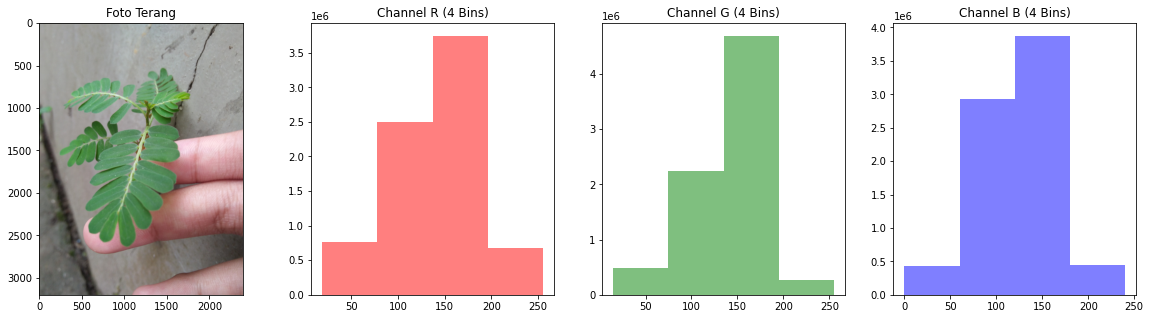

<Figure size 432x288 with 0 Axes>

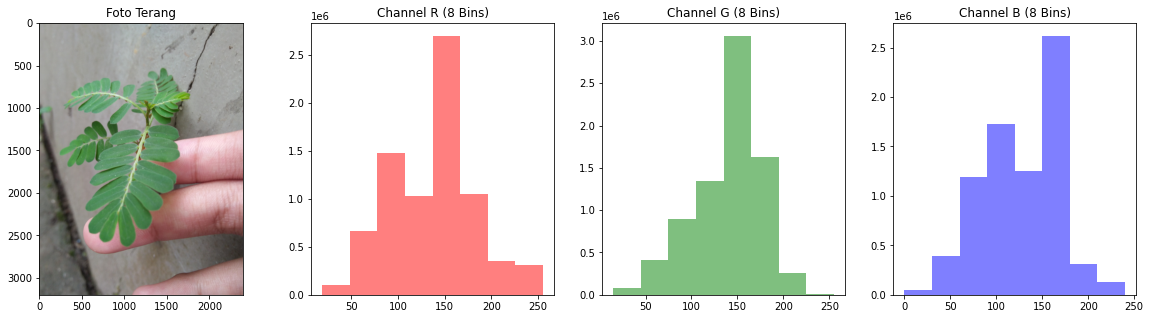

<Figure size 432x288 with 0 Axes>

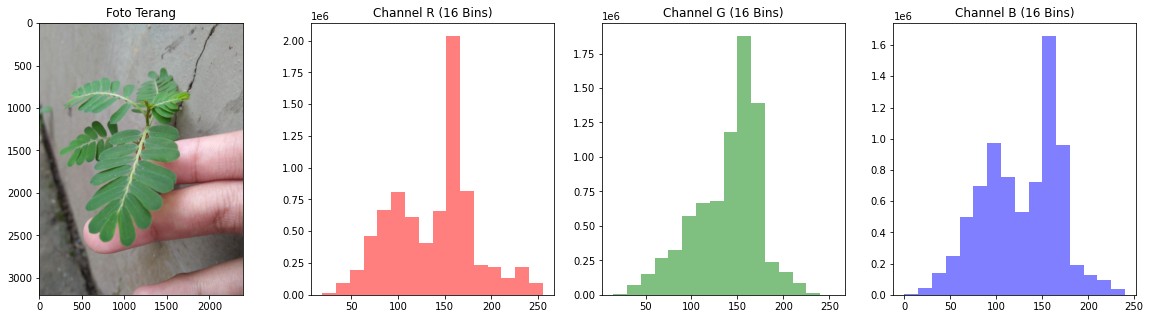

<Figure size 432x288 with 0 Axes>

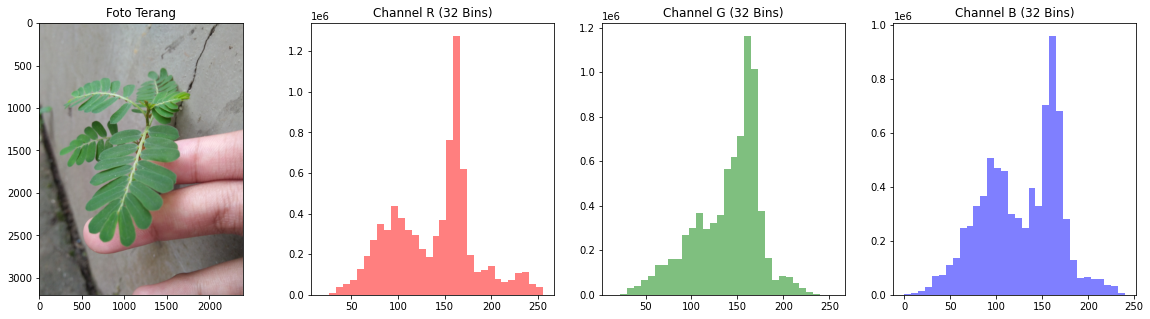

In [8]:
# foto terang per-channel dan per-bins
def terang_bins():
  figure(0)
  rgb_bins("/terang.jpg", 4, "Foto Terang", "Channel R (4 Bins)", "Channel G (4 Bins)", "Channel B (4 Bins)")
  figure(1) 
  rgb_bins("/terang.jpg", 8, "Foto Terang", "Channel R (8 Bins)", "Channel G (8 Bins)", "Channel B (8 Bins)")
  figure(2)
  rgb_bins("/terang.jpg", 16, "Foto Terang", "Channel R (16 Bins)", "Channel G (16 Bins)", "Channel B (16 Bins)")
  figure(3)
  rgb_bins("/terang.jpg", 32, "Foto Terang", "Channel R (32 Bins)", "Channel G (32 Bins)", "Channel B (32 Bins)")

terang_bins()

<Figure size 432x288 with 0 Axes>

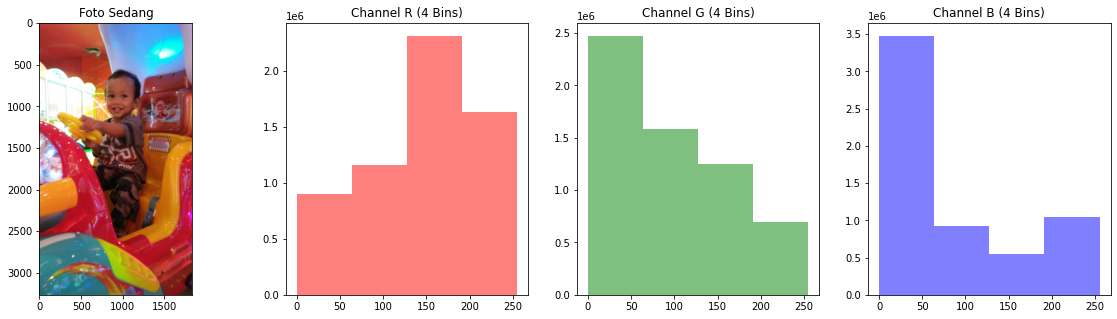

<Figure size 432x288 with 0 Axes>

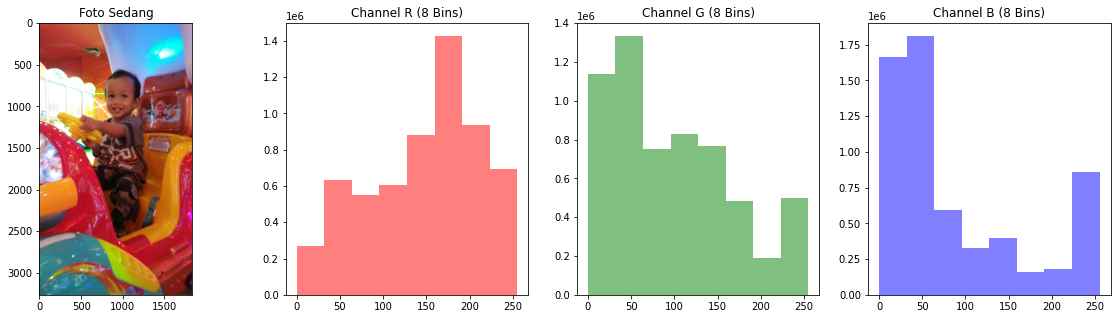

<Figure size 432x288 with 0 Axes>

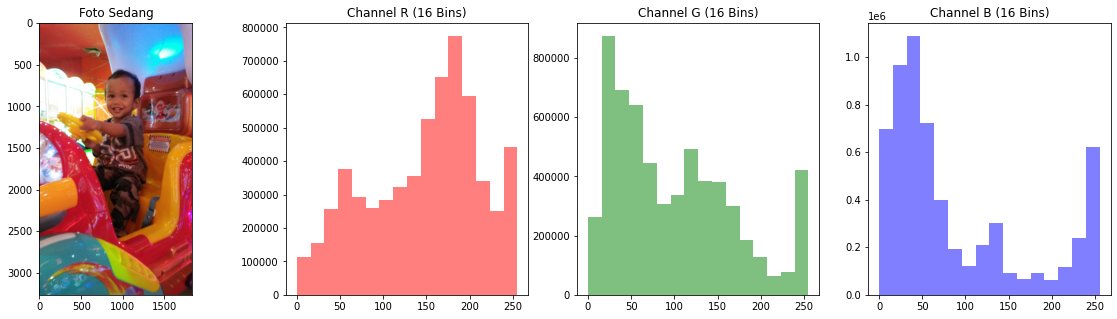

<Figure size 432x288 with 0 Axes>

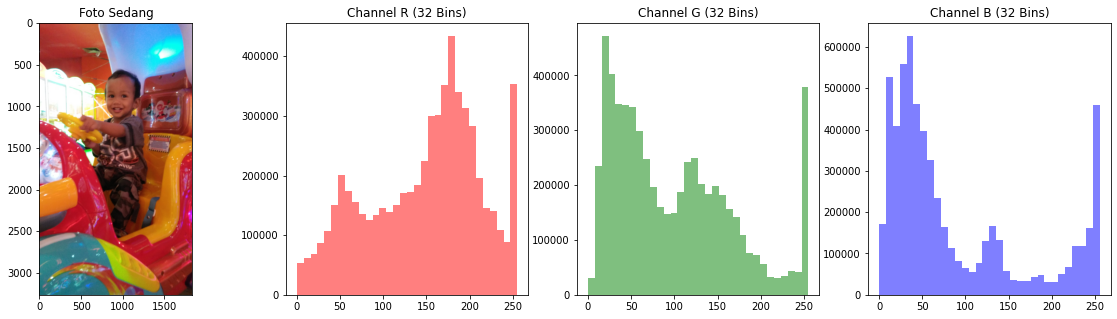

In [12]:
# foto sedang per-channel dan per-bins
def sedang_bins():
  figure(0)
  rgb_bins("/sedang.jpg", 4, "Foto Sedang", "Channel R (4 Bins)", "Channel G (4 Bins)", "Channel B (4 Bins)")
  figure(1) 
  rgb_bins("/sedang.jpg", 8, "Foto Sedang", "Channel R (8 Bins)", "Channel G (8 Bins)", "Channel B (8 Bins)")
  figure(2)
  rgb_bins("/sedang.jpg", 16, "Foto Sedang", "Channel R (16 Bins)", "Channel G (16 Bins)", "Channel B (16 Bins)")
  figure(3)
  rgb_bins("/sedang.jpg", 32, "Foto Sedang", "Channel R (32 Bins)", "Channel G (32 Bins)", "Channel B (32 Bins)")

sedang_bins()

<Figure size 432x288 with 0 Axes>

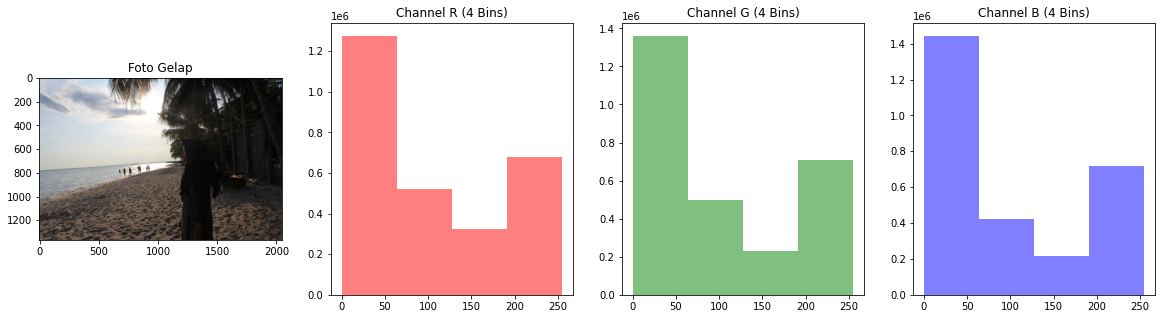

<Figure size 432x288 with 0 Axes>

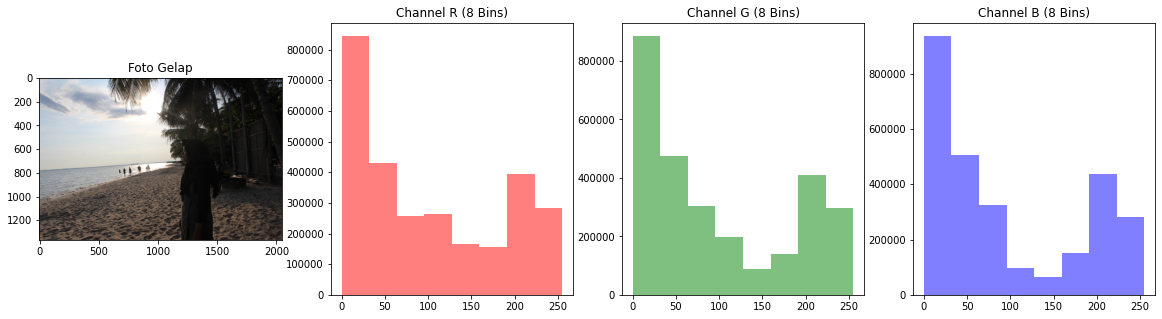

<Figure size 432x288 with 0 Axes>

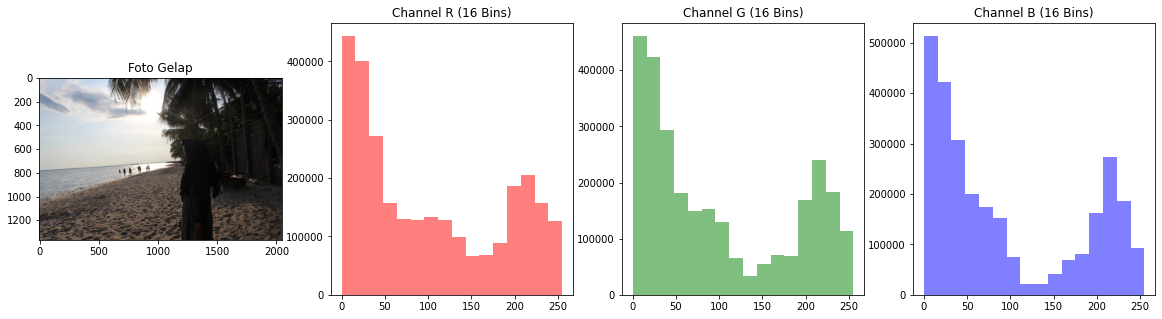

<Figure size 432x288 with 0 Axes>

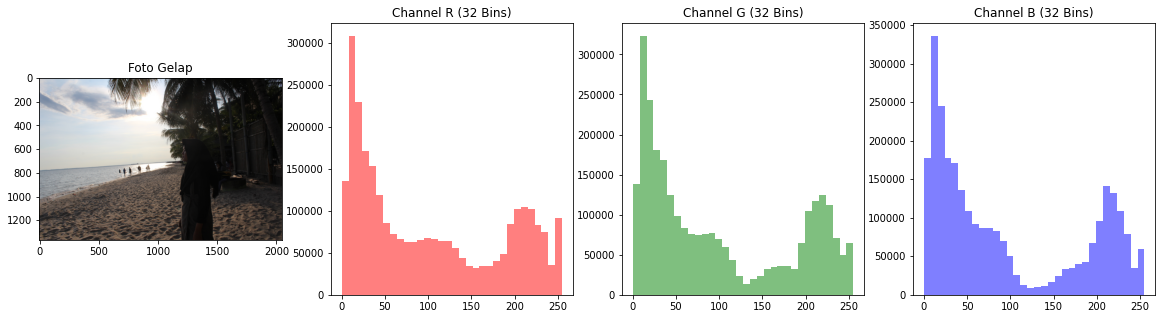

In [14]:
# foto gelap per-channel dan per-bins

def gelap_bins():
  figure(0)
  rgb_bins("/gelap.jpg", 4, "Foto Gelap", "Channel R (4 Bins)", "Channel G (4 Bins)", "Channel B (4 Bins)")
  figure(1) 
  rgb_bins("/gelap.jpg", 8, "Foto Gelap", "Channel R (8 Bins)", "Channel G (8 Bins)", "Channel B (8 Bins)")
  figure(2)
  rgb_bins("/gelap.jpg", 16, "Foto Gelap", "Channel R (16 Bins)", "Channel G (16 Bins)", "Channel B (16 Bins)")
  figure(3)
  rgb_bins("/gelap.jpg", 32, "Foto Gelap", "Channel R (32 Bins)", "Channel G (32 Bins)", "Channel B (32 Bins)")

gelap_bins()

In [ ]:
def rgb_channel(img):
  red_channel = deepcopy(img)
  green_channel = deepcopy(img)
  blue_channel = deepcopy(img)

  red_channel[:,:,1] = 0
  red_channel[:,:,2] = 0

  green_channel[:,:,0] = 0
  green_channel[:,:,2] = 0

  blue_channel[:,:,0] = 0
  blue_channel[:,:,1] = 0

  fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,15))

  ax[0,0].imshow(img)
  ax[0,0].set_title('Original')

  ax[0,1].imshow(red_channel)
  ax[0,1].set_title('Red Channel')

  ax[1,0].imshow(green_channel)
  ax[1,0].set_title('Green Channel')

  ax[1,1].imshow(blue_channel)
  ax[1,1].set_title('Blue Channel')

  cv2.imwrite("/redchannel.jpg", blue_channel)
  cv2.imwrite("/greenchannel.jpg", green_channel)
  cv2.imwrite("/bluechannel.jpg", red_channel)

  plt.show()

In [ ]:
def rgb_photo():
  print("""
  1. Foto Terang
  2. Foto Sedang
  3. Foto Gelap
  """)
  choose = int(input("Pilih : "))
  
  if choose==1:
    rgb_channel(img_terang)
  elif choose==2:
    rgb_channel(img_sedang)
  elif choose==3:
    rgb_channel(img_gelap)
  else:
    print("tidak ada")

rgb_photo()